In [1]:
devtools::document()
knitr::opts_chunk$set(echo = TRUE)

ℹ Updating cinof1 documentation

ℹ Loading cinof1

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“[/home/nils/cinof1/R/adjtreat.R:25] @example spans multiple lines. Do you want @examples?”
Warning message:
“[/home/nils/cinof1/R/basic_functions.R:64] @example spans multiple lines. Do you want @examples?”


Writing NAMESPACE
Writing NAMESPACE


# Introduction

This R Markdown document shows the usage of the package `cino1`. 

In [2]:
# Install local package
devtools::document()
install.packages("~/Documents/Masterarbeit/Package/nofone/", repos = NULL, type="source")
# load package
library(cinof1)
library(doParallel)

ℹ Updating cinof1 documentation

ℹ Loading cinof1

Warning message:
“[/home/nils/cinof1/R/adjtreat.R:25] @example spans multiple lines. Do you want @examples?”
Warning message:
“[/home/nils/cinof1/R/basic_functions.R:64] @example spans multiple lines. Do you want @examples?”


Writing NAMESPACE
Writing NAMESPACE


Installing package into ‘/home/nils/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

Warning message in install.packages("~/Documents/Masterarbeit/Package/nofone/", :
“installation of package ‘/home/nils/Documents/Masterarbeit/Package/nofone/’ had non-zero exit status”
Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



## Data

In this package, a sample data frame is included. It contains data for 300 patients within an n of 1 study. The data has the following structure:

* _patient_id_: Unique patient identifier
* _date_: Date of data points
* _day_: Day in study
* _Block_: identifies treatment block
* _Activity_: Dummy variable for steps per day
* _treatment_: Dummy variable for 2 treatments as factors
* _Uncertain_Low_Back_Pain_: Dummy variable for Uncertain loq back pain on scale 1-15

In [3]:
load("data/simpatdat.rda")
# Summarize Data
summary(simpatdat)

   patient_id            date           day               treatment   
 Min.   : 0.00   2018-01-01:  20   Min.   :  1.00   Treatment_1:1120  
 1st Qu.: 4.75   2018-01-02:  20   1st Qu.: 28.75   Treatment_2:1120  
 Median : 9.50   2018-01-03:  20   Median : 56.50                     
 Mean   : 9.50   2018-01-04:  20   Mean   : 56.50                     
 3rd Qu.:14.25   2018-01-05:  20   3rd Qu.: 84.25                     
 Max.   :19.00   2018-01-06:  20   Max.   :112.00                     
                 (Other)   :2120                                      
 Uncertain_Low_Back_Pain     block         Activity       
 Min.   : 6.000          Min.   :1.00   Min.   :   45.19  
 1st Qu.: 9.000          1st Qu.:1.75   1st Qu.: 5563.32  
 Median : 9.000          Median :2.50   Median : 6910.56  
 Mean   : 9.231          Mean   :2.50   Mean   : 6943.34  
 3rd Qu.:10.000          3rd Qu.:3.25   3rd Qu.: 8290.16  
 Max.   :12.000          Max.   :4.00   Max.   :14084.38  
                   

## Basic Functions

Basic functions for analyse N-of-1 studys are for example wilcox test or comparative plots. These two functions are provided in this package.

### Comparative Plot

To get a first idea about the data and the difference between treatment 1 and treatment 2, a comparative plot could be used. It shows the outcome on the y-Axis against the different treatments on the x-Axis,

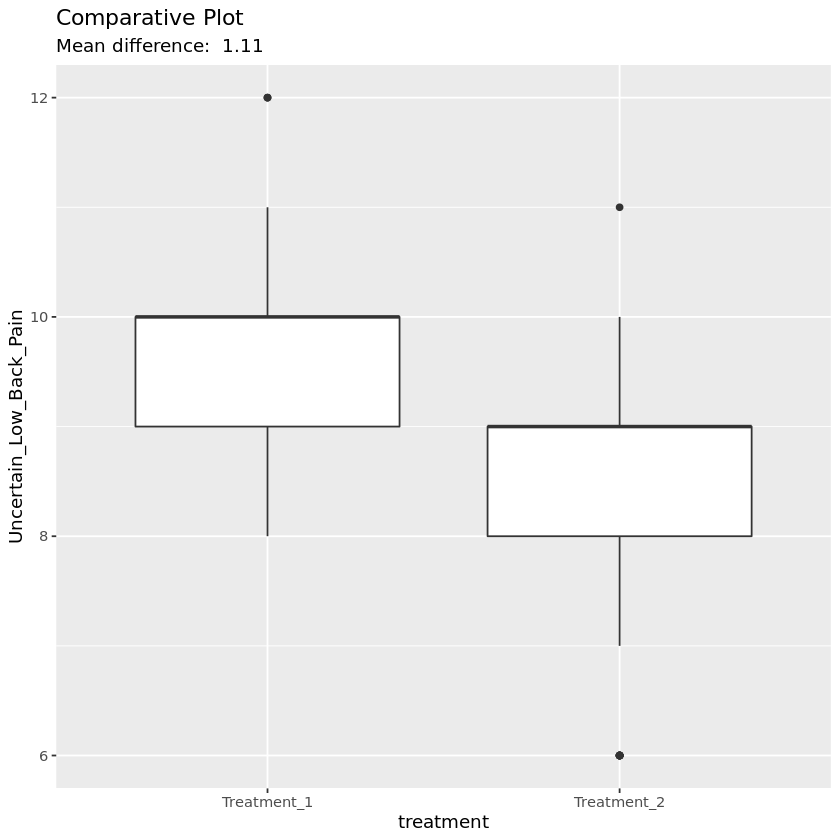

In [4]:
# Define outcome and exposure column
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
# Plot outcome among different exposures
comparative.plot(simpatdat, exposure = exposure, outcome = outcome)

## Wilcox Test

To validate, that there is a difference in both treatments, the Wilcox test could be used. It calculates the p-value for the null hypothesis, that there location shift is equal to zero.

In [5]:
# Define outcome and exposure column
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
# Perform Wilcox test among different exposures
wilcox.nofone(simpatdat, exposure = exposure, outcome = outcome)


	Wilcoxon rank sum test

data:  Uncertain_Low_Back_Pain by treatment
W = 1048691, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


## Adjust Wash In and Wash Out


In [6]:
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
variables <- c("Activity")
id <- "patient_id"
time_col <- "day"

result <- estimate.gamma.tau(data = simpatdat, outcome = outcome, exposure = exposure, variables = variables, bound = 2, symmetric = TRUE, id=id, time_col = time_col)

result

fit.adj.lm(data = simpatdat, outcome = outcome, exposure = exposure, variables = variables, effects = result$best, id = id, time_col = time_col)

$data
  treatment.Treatment_1.gamma treatment.Treatment_2.gamma
1                           1                           1
2                           2                           1
3                           1                           2
4                           2                           2
  treatment.Treatment_1.tau treatment.Treatment_2.tau        r2
1                         1                         1 0.3925277
2                         2                         1 0.3922651
3                         1                         2 0.4098408
4                         2                         2 0.4429989
  treatment.Treatment_1.Estimate treatment.Treatment_1.Std..Error
1                     1.11654798                       0.03050288
2                    -0.03097696                       0.16987892
3                    -0.48246803                       0.19819322
4                    -3.24965646                       0.27524924
  treatment.Treatment_2.Estimate treatment.Treatment_2.Std..Error
1                             NA                               NA
2                      -1.145895                        0.1638043
3                      -1.656651                        0.2029606
4                      -4.357631                        0.2717909

$best
  treatment.Treatment_1.gamma treatment.Treatment_2.gamma
4                           2                           2
  treatment.Treatment_1.tau treatment.Treatment_2.tau
4                         2                         2

Warning message in if (is.na(effects)) {:
“the condition has length > 1 and only the first element will be used”



Call:
lm(formula = formula(str_formula), data = data, na.action = na.omit)

Coefficients:
                        (Intercept)  treatment.Treatment_1.gamma.2.tau.2  
                          1.360e+01                           -3.250e+00  
                           Activity  treatment.Treatment_2.gamma.2.tau.2  
                         -8.569e-05                           -4.358e+00  


## Bayesian

Bayesian Networks are used to calculated the probability of outcome variables adjusted for confounders. For that, a dag is required, which identifies the relations between the variables.
In this implementation, also lags are included and could be specified in the dag by adding `.lag=` to the variable name.

###  Preprocess Data

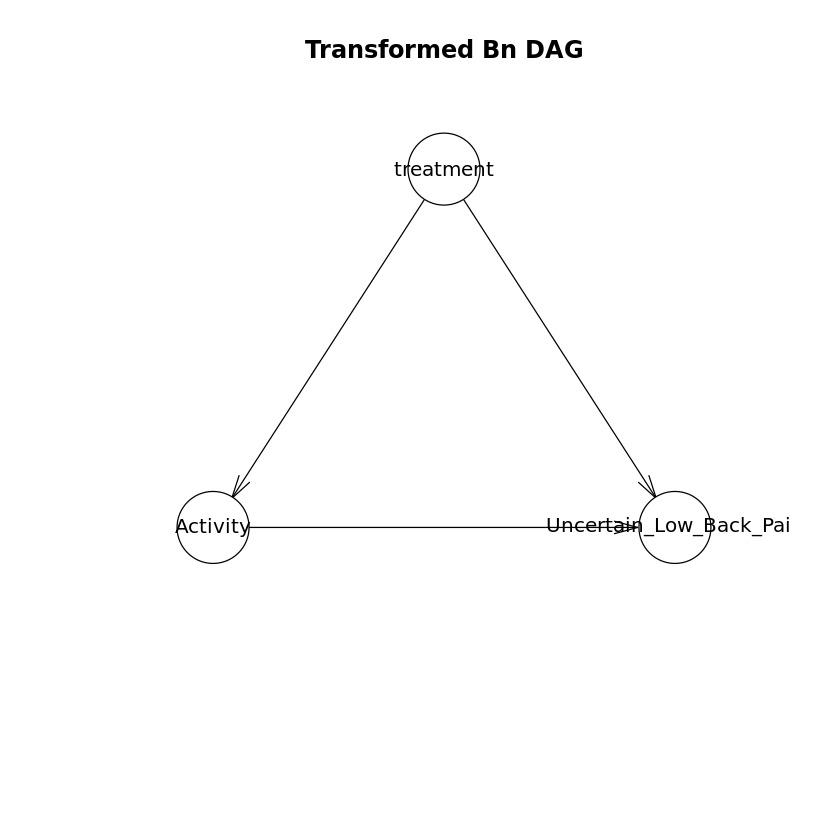

In [7]:
# specify column names
id <- "patient_id"
time_col <- "day"

# Load data
load("data/simpatdag.rda")
load("data/simpatdat.rda")

# Dag preprocessing
bn.dag <- bn.prep.dag(simpatdag)

# Data Preprocessing (Factorization)
simpatdat$Uncertain_Low_Back_Pain <- as.factor(simpatdat$Uncertain_Low_Back_Pain)
simpatdat$Activity <- cut(simpatdat$Activity, 3, labels=c("low Activity", "middle Activity", "high Activity"))
bn.data <- bn.prep.data(bn.dag, simpatdat, id, time_col)
bn.data <- na.omit(bn.data)

### Fit and Plot Results

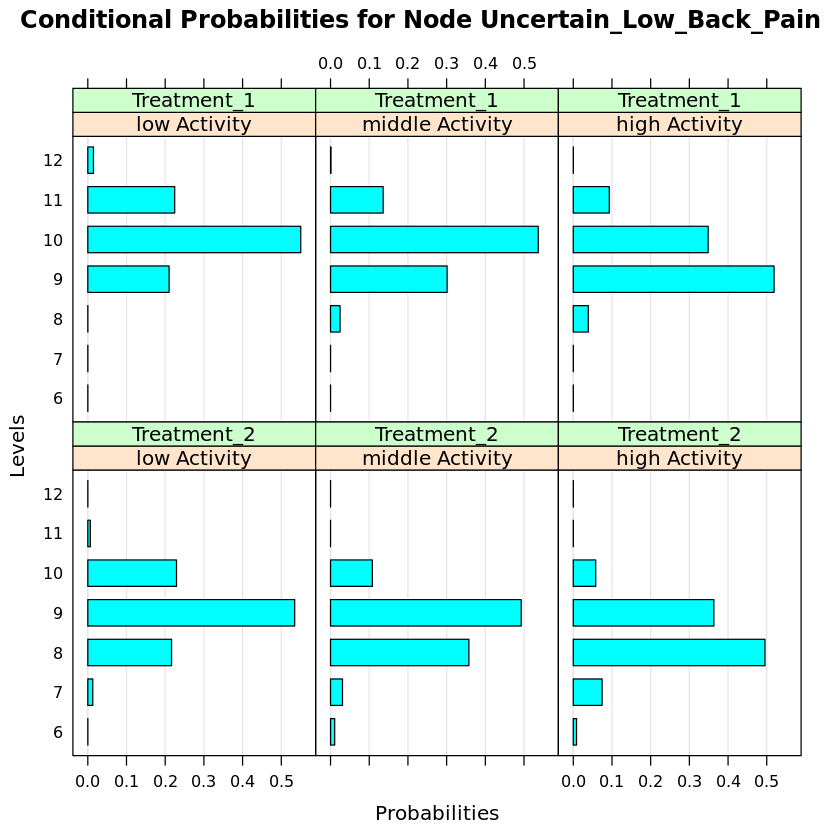

In [8]:
fitted.bn <- bn.fit.dag(bn.data, bn.dag, method="bayes")

library(bnlearn)
bn.fit.barchart(fitted.bn$Uncertain_Low_Back_Pain)

## G-Estimation

G-Estimation is used to adjust the analysis for causal inferences. For that, three different methods are implemented

### Load Data

In [9]:
load("data/simpatdat.rda")

### Fit G-Estimation by Iteration
It iterates over several values for $\psi$ and returns a data frame with $\psi$ and corresponding $\alpha$

In [10]:
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
confounder <- c("Activity")
id <- "patient_id"
df <- nofgest(simpatdat, outcome, exposure, confounder, id, method="iterate", steps=100, upper_bound_psi = 10, lower_bound_psi = -10)

This function is useful to plot a curve for $\alpha$ and $\psi$.

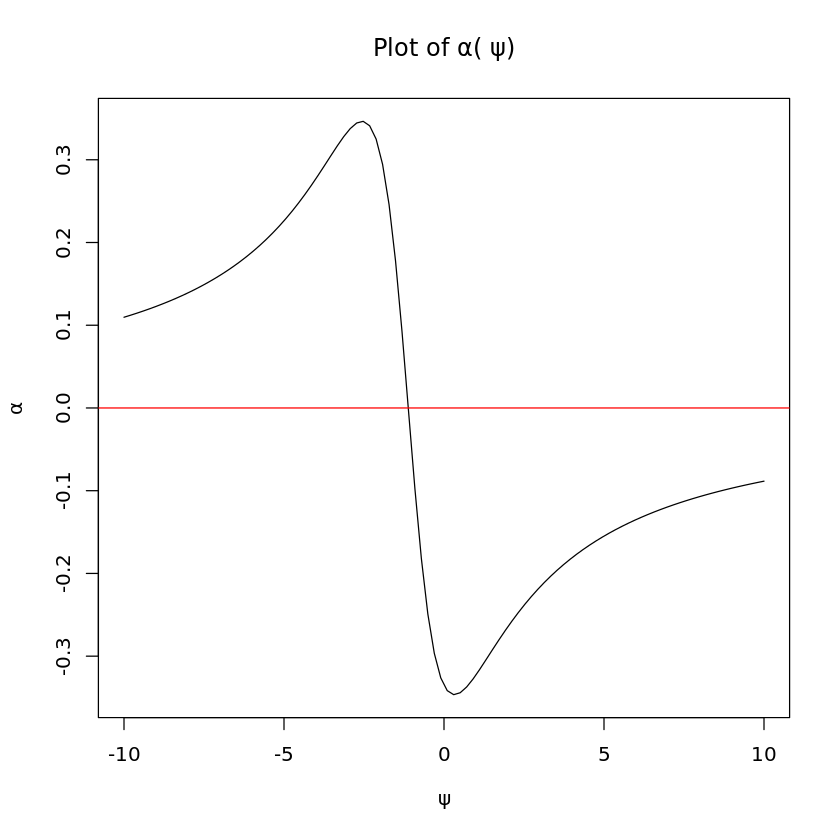

In [11]:
plot( df$PSI ,df$Beta, type="l", main=expression(paste("Plot of ", alpha, "( ", psi,")")),
        xlab=expression(psi),
        ylab=expression(alpha))
# Add a second line
lines( c(-100,100),c(0,0), type = "l", col = "red")

### Fit G-Estimation by Recursive Mean

This function approximate $\psi$ by an interval search.

In [12]:
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
confounder <- c("Activity")
id <- "patient_id"
nofgest(simpatdat, outcome, exposure, confounder, id, method="rec_mean", max_number_it = 10, verbose=FALSE)

[1] "Max Iterations:"


,upper_psi,upper_beta,upper_se,lower_psi,lower_beta,lower_se,iteration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.109375,-0.003446206,0.040946897,-1.117188,0.0003072594,0.03584373,10
2,-1.109375,-0.003446206,0.040946897,-1.117188,0.0003072594,0.03584373,9
3,-1.109375,-0.003446206,0.040946897,-1.125000,0.0040606711,0.03584373,8
4,-1.093750,-0.010950659,0.040608006,-1.125000,0.0040606711,0.03584373,7
5,-1.062500,-0.025931203,0.039908527,-1.125000,0.0040606711,0.03584373,6
6,-1.000000,-0.055632933,0.038450862,-1.125000,0.0040606711,0.03584373,5
7,-1.000000,-0.055632933,0.038450862,-1.250000,0.0635736508,0.03584373,4
8,-1.000000,-0.055632933,0.038450862,-1.500000,0.1720752047,0.03584373,3
9,-1.000000,-0.055632933,0.038450862,-2.000000,0.3086996366,0.03584373,2


### Fit G-Estimation by Recursive Improved

This function approximate $\psi$ by an optimized interval search.

In [13]:
outcome <- "Uncertain_Low_Back_Pain"
exposure <- "treatment"
confounder <- c("Activity")
id <- "patient_id"
nofgest(simpatdat, outcome, exposure, confounder, id, method="rec", max_number_it = 10, verbose=FALSE)

[1] "Converged! Optimal Psi:  -1.1165479816877"


,upper_psi,upper_beta,upper_se,lower_psi,lower_beta,lower_se,iteration
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-1.1165480,-1.179378e-17,0.041099672,-1.116548,9.698380e-08,0.03584373,8
2,-1.1165480,-1.179378e-17,0.041099672,-1.116548,9.698380e-08,0.03584373,7
3,-1.1165480,-1.915311e-15,0.041099672,-1.116548,9.698380e-08,0.03584373,6
4,-1.1162943,-1.219032e-04,0.041094300,-1.116548,9.698380e-08,0.03584373,5
5,-1.1162943,-1.219032e-04,0.041094300,-1.157368,1.959637e-02,0.03584373,4
6,-0.9804303,-6.482132e-02,0.037986401,-1.157368,1.959637e-02,0.03584373,3
7,-0.9804303,-6.482132e-02,0.037986401,-2.000000,3.086996e-01,0.03584373,2
8,0.1551857,-3.438355e-01,0.024008679,-2.000000,3.086996e-01,0.03584373,1
9,2.0000000,-2.642434e-01,0.008784946,-2.000000,3.086996e-01,0.03584373,0
